In [ ]:
# Checking attendance rates by account ids

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
# import the libraries
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Crossroads/engg_data/crossroads_full_feature_set.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (0,7,30) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df['isSTM']=df['isSTM'].fillna(0)
df['Resold']=df['Resold'].fillna(0)
df.loc[(df['Resold']!=0),'Resold'] = 1
df.head()

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,PC1,Price,paid,add_datetime,class_name,status,Sales_Source,isHost,SeatType,TicketClass,Start Year,LastYear,Term,TicketType,SeatUniqueID,Season,ClubExpYear,Tenure,UniqueID,isAttended,Resold,ResalePrice,ResaleDate,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,PC1_group,class_name_grp,ticket_class_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,lastyear_minus_gameday,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Game Time,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Precipitation,Avg_Dew_Point,weekend_flag
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,F,111.0,Y,2021-03-31 16:08:52,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-1,2021,NaN,25.0,CLT21HOU-101-10-1,Yes,0,NaN,NaN,0.0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,NaN,NaN,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1
1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-10,2021,NaN,20.0,CLT21HOU-101-10-10,No,0,NaN,NaN,0.0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,NaN,NaN,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1
2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-11,2021,NaN,20.0,CLT21HOU-101-10-11,No,0,NaN,NaN,0.0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,NaN,NaN,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1
3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,FR,F,111.0,Y,2021-03-31 16:10:20,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-12,2021,NaN,4.0,CLT21HOU-101-10-12,Yes,0,NaN,NaN,0.0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,NaN,NaN,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1
4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,FR,F,111.0,Y,2021-03-31 16:08:21,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-13,2021,NaN,32.0,CLT21HOU-101-10-13,No,0,NaN,NaN,0.0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,NaN,NaN,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1


In [ ]:
def pivot(train_data, group_cols, agg_col):
    data = train_data.groupby(group_cols).agg({agg_col: "count"}).reset_index()
    data = pd.pivot_table(data, values=agg_col, index=[group_cols[0]], columns=[group_cols[1]], aggfunc=np.sum).reset_index().rename_axis(None, axis=1)
    data = data.fillna(0)
    data["count"] = data["Yes"] + data["No"]
    data["%Attended"] = 100*data["Yes"]/(data["Yes"]+data["No"])
    return data

In [ ]:
df_copy= df.copy()
accnt_type_df = pivot(df_copy, ["acct_id", "isAttended"], "UniqueID")
test_acct_ids = df_copy[df_copy["isAttended"]=="???"]["acct_id"].values

temp = df_copy[df_copy["isAttended"]!="???"]
acct_count_df = temp.groupby("acct_id").agg({"event_name": "nunique"}).reset_index()
acct_count_df = acct_count_df.rename(columns={"event_name": "event_name_count"})


df_copy = df_copy.merge(accnt_type_df[["acct_id", "count", "%Attended"]], on="acct_id", how="left")
df_copy = df_copy.merge(acct_count_df[["acct_id", "event_name_count"]], on="acct_id", how="left")

In [ ]:
# df_copy.isnull().sum()["SeatType"]

In [ ]:
df_copy["SeatType"].value_counts()

GA      1142036
Club     144880
Name: SeatType, dtype: int64

In [ ]:
df_copy=df_copy[df_copy["isAttended"]!="???"]

In [ ]:
df_copy.loc[df['status']=='SOLD','status_flag']=1
df_copy.loc[df['status']!='SOLD','status_flag']=0

df_copy.loc[df['status']=='COMP','status_flag_comp']=1
df_copy.loc[df['status']!='COMP','status_flag_comp']=0


In [ ]:
df_copy.groupby(['event_name']).mean()[['Avg_Day_Temp',	'Precipitation','%Attended']]

,Avg_Day_Temp,Precipitation,%Attended
event_name,,,
CLT21HOU,52.12,0.00,70.112163
CLT21JAX,34.28,0.00,73.900772
CLT21LAR,76.44,0.00,77.032063
CLT21NE,39.22,0.55,81.796220
CLT21NYJ,39.47,0.00,71.994595
CLT21PRE,72.06,0.00,70.034044
CLT21SEA,76.94,0.00,76.952606
CLT21TB,33.84,0.00,82.179666
CLT21TEN,50.20,0.00,72.376970


In [ ]:
df_copy.loc[(df['comp_name']=='Stadium Personnel') | \
            (df['comp_name']=='Youth Football') | \
            (df['comp_name']=='archiveBusiness') | \
            (df['comp_name']=='Miscellaneous') | \
            (df['comp_name']=='Charity/Community Relations') | \
            (df['comp_name']=='Military')
             ,'comp_name_flag_0']=1
df_copy['comp_name_flag_0']=df_copy['comp_name_flag_0'].fillna(0)

df_copy.loc[(df['comp_name']=='Front Office/Club Staff') | \
            (df['comp_name']=='Covid-19') | \
            (df['comp_name']=='Coaches & Trainers') | \
            (df['comp_name']=='Players') | \
            (df['comp_name']=='Game Official and Chain Crew') | \
            (df['comp_name']=='Game Entertainment') | \
            (df['comp_name']=='League Employees') | \
            (df['comp_name']=='Media') | \
            (df['comp_name']=='Promotions')
             ,'comp_name_flag_1']=1
df_copy['comp_name_flag_1']=df_copy['comp_name_flag_1'].fillna(0)


df_copy.loc[(df['comp_name']=='Ownership Guests') | \
            (df['comp_name']=='VIP/Local Dignitaries') | \
            (df['comp_name']=='Not Comp') | \
            (df['comp_name']=='Club Alumni') | \
            (df['comp_name']=='Sales Prospecting') | \
            (df['comp_name']=='Sponsors') | \
            (df['comp_name']=='Customer Service') 
             ,'comp_name_flag_2']=1
df_copy['comp_name_flag_2']=df_copy['comp_name_flag_2'].fillna(0)



In [ ]:
df_copy['status'].value_counts()

SOLD     1037158
AVAIL      73931
COMP       47134
HELD           5
Name: status, dtype: int64

In [ ]:
df_acc_level=df_copy.groupby(['acct_id']).agg({'%Attended': 'mean', 
                                  'event_name_count': 'mean',
                                  'Tenure':'mean',
                                  'Price':'mean',
                                  'comp_name_flag_0': 'sum',
                                  'comp_name_flag_1': 'sum',
                                  'comp_name_flag_2': 'sum',
                                  'status_flag':'sum',
                                  'status_flag_comp':'sum',
                                  'count':'mean',
                                  'Resold':'sum',
                                  'no_days_prebooked': 'mean'
                                  }).reset_index()

In [ ]:
df_acc_level['%purchase']=df_acc_level['status_flag']/df_acc_level['count']
df_acc_level['%Attended']=df_acc_level['%Attended'].fillna(value=np.mean(df_acc_level['%Attended']))
df_acc_level['Tenure']=df_acc_level['Tenure'].fillna(value=np.mean(df_acc_level['Tenure']))
df_acc_level['event_name_count']=df_acc_level['event_name_count'].fillna(value=np.mean(df_acc_level['event_name_count']))

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data=scaler.fit_transform(df_acc_level[['%Attended',"event_name_count","Price"	,"Tenure"]])

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_data)
    distortions.append(kmeanModel.inertia_)

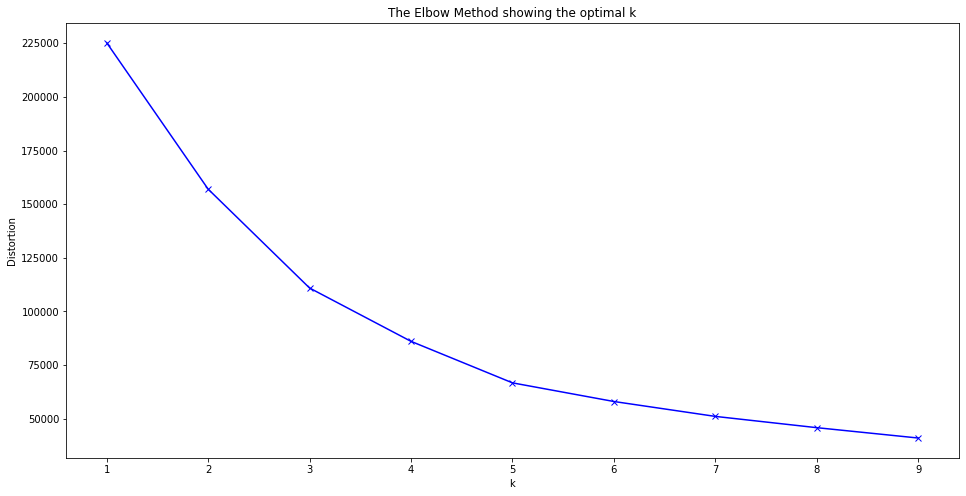

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(scaled_data)

KMeans(n_clusters=4)

In [ ]:
df_acc_level['cluster']=kmeanModel.predict(scaled_data)

In [ ]:
df_acc_level.head()

,acct_id,%Attended,event_name_count,Tenure,Price,comp_name_flag_0,comp_name_flag_1,comp_name_flag_2,status_flag,status_flag_comp,count,Resold,no_days_prebooked,%purchase,cluster
0,190,0.534248,18.0,6.38457,63.966903,0.0,0.0,0.0,0.0,0.0,69069.0,0,NaN,0.0,2
1,14999990,0.000000,2.0,18.00000,173.000000,0.0,0.0,8.0,8.0,0.0,8.0,0,-0.509125,1.0,2
2,16999990,0.000000,1.0,15.00000,93.000000,0.0,0.0,1.0,1.0,0.0,1.0,0,-0.449700,1.0,2
3,110002390,76.984127,18.0,38.00000,86.071429,0.0,0.0,126.0,126.0,0.0,126.0,0,163.386508,1.0,3
4,110003490,84.375000,16.0,38.00000,298.125000,0.0,0.0,160.0,160.0,0.0,160.0,0,241.412500,1.0,3


In [ ]:
def cluster_label(row):
  if row["cluster"]==1:
    return "Die-Hards"
  elif row["cluster"]==2:
    return "Apathetics"
  elif row["cluster"]==0:
    return "Affluents"
  else:
    return "Maturists"


In [ ]:
kmeanModel.labels_

array([2, 2, 2, ..., 1, 1, 2], dtype=int32)

In [ ]:
# df_acc_level.to_csv("/content/drive/MyDrive/Crossroads/Account_level_clusters_v2.csv", index=False)

In [ ]:
clusters=df_acc_level.groupby('cluster').agg({'acct_id':'count',
                                              'Price':np.median, \
                                              "%Attended":'mean',
                                              "event_name_count":'mean',
                                              "Tenure":'mean',
                                              "comp_name_flag_0":'mean',
                                              "comp_name_flag_1":'mean',
                                              "comp_name_flag_2":'mean',
                                              "status_flag"	:'mean',
                                              "status_flag_comp"	:'mean',
                                              "count":'mean',
                                              "%purchase":'mean',
                                              "Resold":'sum',
                                              "no_days_prebooked":'mean'                                          

                                              }).reset_index()

In [ ]:
clusters['%purchase/total']=clusters['status_flag']*100/(clusters['status_flag']+clusters['status_flag_comp'])
clusters['%Resold']=clusters['Resold']*100/clusters['count']

In [ ]:
clusters #.to_csv('crossroad_acc_segments.csv')

,cluster,acct_id,Price,%Attended,event_name_count,Tenure,comp_name_flag_0,comp_name_flag_1,comp_name_flag_2,status_flag,status_flag_comp,count,%purchase,Resold,no_days_prebooked,%purchase/total,%Resold
0,0,5127,293.066667,90.657229,5.685196,8.316676,0.000000,0.000000,18.195631,18.195631,0.000000,18.195631,1.000000,7049,171.171490,100.000000,38740.069033
1,1,33270,85.555556,96.991779,2.055636,2.637655,0.114367,0.169071,9.193448,9.091764,0.385122,9.476886,0.972943,64559,92.556219,95.936200,681225.873465
2,2,5491,58.000000,13.749785,1.847569,3.334979,1.825168,0.844655,4.285740,4.270989,2.684575,20.420506,0.890253,477,73.892609,61.403922,2335.887237
3,3,12421,115.851852,85.210490,15.472909,16.971419,0.168988,1.308268,49.848241,49.749135,1.576363,51.325497,0.978009,63381,234.849639,96.928695,123488.331394


In [ ]:
df_acc_level['cluster_name'] = df_acc_level.apply(lambda x: cluster_label(x), 1)

# Cluster-0 (die-hard)
*   Average Price
*   High Attendance
*   Low event count -> entice them into attending more events
*   Relatively new customers
*   Pre-book 3-4 months before
*   Most resold -> want to attend by any means

# Cluster-1 (casual)
*   Cheap Price
*   Very low Attendance
*   Low event count
*   Relatively new customers
*   Pre-book 2-3 months before -> they only book tickets close to match day
*   Least resold -> not desperate to attend

# Cluster-2 (elite)
*   Very high Price
*   High Attendance
*   Moderate event count
*   Relatively old customers
*   Pre-book 5-6 months before
*   Average resold -> not often resold

# Cluster-3 (veteran)
*   Moderate to high Price
*   Good Attendance
*   Very high event count
*   Very old customers -> old Colts fans, entice them with merchandise?
*   Pre-book 7-8 months before 
*   Average resold -> not often resold


In [ ]:
# import plotly.express as px
# df = px.data.iris()
# fig = px.scatter_3d(df_acc_level, x='%Attended', y='event_name_count', z='Price',
#               color='cluster')
# fig.show()

In [ ]:
df_acc_level.shape

(56309, 16)

In [ ]:
df_acc_level.groupby('event_name_count').agg({'acct_id':'count'})

,acct_id
event_name_count,
1.0,32604
2.0,4958
3.0,1356
4.0,115
5.0,107
6.0,161
7.0,353
8.0,358
9.0,3855


In [ ]:
df_acc_level[df_acc_level['event_name_count']>1].shape[0]/df_acc_level.shape[0]

0.42098066028521197

In [ ]:
df_copy['acct_id'].unique().shape

(56309,)

In [ ]:
new_cust=df_copy.groupby('acct_id').agg({'event_name':'nunique'}).reset_index()

In [ ]:
new_cust

,acct_id,event_name
0,190,18
1,14999990,2
2,16999990,1
3,110002390,18
4,110003490,16
...,...,...
56304,0199503290,1
56305,0199636990,1
56306,0199724190,2
56307,0199823390,2


In [ ]:
new_cust[new_cust['event_name']>1].shape[0]/ new_cust.shape[0]

0.42098066028521197

In [ ]:
df_acc_level.head()

,acct_id,%Attended,event_name_count,Tenure,Price,comp_name_flag_0,comp_name_flag_1,comp_name_flag_2,status_flag,status_flag_comp,count,Resold,no_days_prebooked,%purchase,cluster,cluster_name
0,190,0.534248,18.0,6.38457,63.966903,0.0,0.0,0.0,0.0,0.0,69069.0,0,NaN,0.0,2,Apathetics
1,14999990,0.000000,2.0,18.00000,173.000000,0.0,0.0,8.0,8.0,0.0,8.0,0,-0.509125,1.0,2,Apathetics
2,16999990,0.000000,1.0,15.00000,93.000000,0.0,0.0,1.0,1.0,0.0,1.0,0,-0.449700,1.0,2,Apathetics
3,110002390,76.984127,18.0,38.00000,86.071429,0.0,0.0,126.0,126.0,0.0,126.0,0,163.386508,1.0,3,Maturists
4,110003490,84.375000,16.0,38.00000,298.125000,0.0,0.0,160.0,160.0,0.0,160.0,0,241.412500,1.0,3,Maturists


In [ ]:
df_acc_level.cluster.value_counts()

0    33270
1    12421
2     5491
3     5127
Name: cluster, dtype: int64

In [ ]:
df2 = df_copy.merge(df_acc_level[["acct_id", "cluster_name"]], on="acct_id")

In [ ]:
df2.head()

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,PC1,Price,paid,add_datetime,class_name,status,Sales_Source,isHost,SeatType,TicketClass,Start Year,LastYear,Term,TicketType,SeatUniqueID,Season,ClubExpYear,Tenure,UniqueID,isAttended,Resold,ResalePrice,ResaleDate,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,PC1_group,class_name_grp,ticket_class_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,lastyear_minus_gameday,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Game Time,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Precipitation,Avg_Dew_Point,weekend_flag,count,%Attended,event_name_count,status_flag,status_flag_comp,comp_name_flag_0,comp_name_flag_1,comp_name_flag_2,cluster_name
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,F,111.0,Y,2021-03-31 16:08:52,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-1,2021,NaN,25.0,CLT21HOU-101-10-1,Yes,0,NaN,NaN,0.0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,NaN,NaN,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,54.0,94.444444,18.0,1.0,0.0,0.0,0.0,1.0,Maturists
1,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,2,FR,F,111.0,Y,2021-03-31 16:08:52,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-2,2021,NaN,25.0,CLT21HOU-101-10-2,Yes,0,NaN,NaN,0.0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,NaN,NaN,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,54.0,94.444444,18.0,1.0,0.0,0.0,0.0,1.0,Maturists
2,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,153,10,21,FR,F,111.0,Y,2021-03-31 16:14:17,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,153-10-21,2021,NaN,25.0,CLT21HOU-153-10-21,Yes,0,NaN,NaN,0.0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,NaN,NaN,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,54.0,94.444444,18.0,1.0,0.0,0.0,0.0,1.0,Maturists
3,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,153,10,22,FR,F,111.0,Y,2021-03-31 16:14:17,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,153-10-22,2021,NaN,25.0,CLT21HOU-153-10-22,Yes,0,NaN,NaN,0.0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,NaN,NaN,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,54.0,94.444444,18.0,1.0,0.0,0.0,0.0,1.0,Maturists
4,117948790,Season,CLT21JAX,2021-11-14,21FS,Not Comp,101,10,1,FR,F,111.0,Y,2021-03-31 16:08:52,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-1,2021,NaN,25.0,CLT21JAX-101-10-1,Yes,0,NaN,NaN,0.0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,227.4,NaN,NaN,1.0,Low,Medium,Low,Low,Reg,10,Sunday,13:00,245,132,2.1,252.9,34.28,0.0,29.31,1,54.0,94.444444,18.0,1.0,0.0,0.0,0.0,1.0,Maturists


In [ ]:
df2["cluster_name"].value_counts()

Maturists     637514
Die-Hards     315296
Apathetics    112129
Affluents      93289
Name: cluster_name, dtype: int64

In [ ]:
df2["cluster_name"].value_counts().sum()

1158228

In [ ]:
637514/1158228, 315296/1158228, 93289/1158228

(0.5504218513107955, 0.27222274025494114, 0.08054459052967118)

In [ ]:
df2.groupby(["cluster_name", "SeatType"]).agg({"acct_id": "count"})

acct_id
cluster_name SeatType         
Affluents    Club        85759
             GA           7530
Apathetics   Club         1611
             GA         110518
Die-Hards    Club          480
             GA         314816
Maturists    Club        42542
             GA         594972

In [ ]:
df2.groupby(["cluster_name", "SeatType"]).agg({"acct_id": "nunique"})

acct_id
cluster_name SeatType         
Affluents    Club         3464
             GA           1832
Apathetics   Club           91
             GA           5409
Die-Hards    Club           89
             GA          33226
Maturists    Club          628
             GA          12047

In [ ]:
pd.options.display.max_rows = None

In [ ]:
G1 = df2.groupby(["event_name", "cluster_name", "SeatType"]).agg({"acct_id": "nunique"})
G1.to_csv("/content/drive/MyDrive/Crossroads/G1.csv", index=False)
G1

acct_id
event_name cluster_name SeatType         
CLT21HOU   Affluents    Club         1443
                        GA             49
           Apathetics   Club           16
                        GA            291
           Die-Hards    Club            2
                        GA           2008
           Maturists    Club          550
                        GA          10759
CLT21JAX   Affluents    Club         1625
                        GA            423
           Apathetics   Club           14
                        GA            523
           Die-Hards    Club            7
                        GA           3186
           Maturists    Club          422
                        GA           9752
CLT21LAR   Affluents    Club         1520
                        GA            104
           Apathetics   Club           28
                        GA            583
           Die-Hards    Club            7
                        GA           3860
           Maturists    Club          504
                        GA           9745
CLT21NE    Affluents    Club         1489
                        GA            179
           Apathetics   Club            9
                        GA            413
           Die-Hards    Club            3
                        GA           3844
           Maturists    Club          553
                        GA          10764
CLT21NYJ   Affluents    Club         1540
                        GA             64
           Apathetics   Club           39
                        GA            863
           Die-Hards    Club           11
                        GA           4123
           Maturists    Club          462
                        GA           8932
CLT21PRE   Affluents    Club         1374
                        GA             51
           Apathetics   Club           19
                        GA           1004
           Die-Hards    Club           31
                        GA           1672
           Maturists    Club          550
                        GA          10703
CLT21SEA   Affluents    Club         1473
                        GA            233
           Apathetics   Club           10
                        GA            555
           Die-Hards    Club            2
                        GA           3102
           Maturists    Club          552
                        GA          10761
CLT21TB    Affluents    Club         1666
                        GA            781
           Apathetics   Club            9
                        GA            501
           Die-Hards    Club            7
                        GA           3819
           Maturists    Club          423
                        GA           9776
CLT21TEN   Affluents    Club         1521
                        GA             53
           Apathetics   Club           24
                        GA            511
           Die-Hards    Club            7
                        GA           3579
           Maturists    Club          505
                        GA           9721
CLT22JAX   Affluents    Club         1451
                        GA             23
           Apathetics   Club            3
                        GA            465
           Die-Hards    Club            2
                        GA           4312
           Maturists    Club          588
                        GA          10451
CLT22KC    Affluents    Club         1455
                        GA            387
           Apathetics   Club            2
                        GA            398
           Die-Hards    Club            1
                        GA           3686
           Maturists    Club          589
                        GA          10456
CLT22LAC   Affluents    Club         1453
                        GA             53
           Apathetics   Club            2
                        GA            447
           Die-Hards    Club            2
                        GA           5210
  

In [ ]:
G2 = df2.groupby(["cluster_name", "isSTM"]).agg({"acct_id": "nunique"})
G2.to_csv("/content/drive/MyDrive/Crossroads/G2.csv", index=False)
G2

acct_id
cluster_name isSTM         
Affluents    0.0       5124
             1.0         10
Apathetics   0.0       5328
             1.0        204
Die-Hards    0.0      30683
             1.0       2877
Maturists    0.0      12325
             1.0      10073

In [ ]:
G3 = df2.groupby(["event_name", "cluster_name", "isSTM"]).agg({"acct_id": "nunique"})
G3.to_csv("/content/drive/MyDrive/Crossroads/G3.csv", index=False)
G3

acct_id
event_name cluster_name isSTM         
CLT21HOU   Affluents    0.0       1482
           Apathetics   0.0        306
           Die-Hards    0.0       2009
           Maturists    0.0      11161
CLT21JAX   Affluents    0.0       2018
           Apathetics   0.0        535
           Die-Hards    0.0       3191
           Maturists    0.0      10072
CLT21LAR   Affluents    0.0       1614
           Apathetics   0.0        608
           Die-Hards    0.0       3863
           Maturists    0.0      10125
CLT21NE    Affluents    0.0       1651
           Apathetics   0.0        421
           Die-Hards    0.0       3846
           Maturists    0.0      11165
CLT21NYJ   Affluents    0.0       1591
           Apathetics   0.0        898
           Die-Hards    0.0       4130
           Maturists    0.0       9289
CLT21PRE   Affluents    0.0       1410
           Apathetics   0.0       1021
           Die-Hards    0.0       1702
           Maturists    0.0      11104
CLT21SEA   Affluents    0.0       1695
           Apathetics   0.0        563
           Die-Hards    0.0       3103
           Maturists    0.0      11159
CLT21TB    Affluents    0.0       2415
           Apathetics   0.0        508
           Die-Hards    0.0       3824
           Maturists    0.0      10093
CLT21TEN   Affluents    0.0       1565
           Apathetics   0.0        533
           Die-Hards    0.0       3582
           Maturists    0.0      10102
CLT22JAX   Affluents    0.0       1452
                        1.0         10
           Apathetics   0.0        269
                        1.0        198
           Die-Hards    0.0       1446
                        1.0       2866
           Maturists    0.0        818
                        1.0      10072
CLT22KC    Affluents    0.0       1815
                        1.0         10
           Apathetics   0.0        201
                        1.0        198
           Die-Hards    0.0        819
                        1.0       2868
           Maturists    0.0        819
                        1.0      10073
CLT22LAC   Affluents    0.0       1480
                        1.0         10
           Apathetics   0.0        280
                        1.0        168
           Die-Hards    0.0       2376
                        1.0       2835
           Maturists    0.0        812
                        1.0      10055
CLT22PHI   Affluents    0.0       1487
                        1.0         10
           Apathetics   0.0        168
                        1.0        181
           Die-Hards    0.0       1508
                        1.0       2858
           Maturists    0.0        782
                        1.0      10069
CLT22PIT   Affluents    0.0       1572
                        1.0         10
           Apathetics   0.0        204
                        1.0        176
           Die-Hards    0.0        977
                        1.0       2851
           Maturists    0.0        819
                        1.0      10064
CLT22PR1   Affluents    0.0       1433
                        1.0          9
           Apathetics   0.0        505
                        1.0        202
           Die-Hards    0.0        935
                        1.0       2874
           Maturists    0.0        817
                        1.0      10073
CLT22PR2   Affluents    0.0       1436
                        1.0          9
           Apathetics   0.0        822
                        1.0        202
           Die-Hards    0.0       1607
                        1.0       2874
           Maturists    0.0        818
                        1.0      10073
CLT22TEN   Affluents    0.0       1490
                        1.0         10
           Apathetics   0.0        325
                        1.0        198
           Die-Hards    0.0       1863
                        1.0       2868
           Maturists    0.0        823
                        1.0      10072
CLT22WAS   Affluents    0.0       1454
              

In [ ]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
df3 = df2.groupby(["section_name", "cluster_name"]).agg({"acct_id": "count"}).reset_index()
df3 = df3.rename(columns={"acct_id": "acct_id_count"})
df3["rank"] = df3.groupby("section_name")["acct_id_count"].rank(method="dense", ascending=False)

In [ ]:
df4 = df2.groupby("section_name").agg({"SeatNum": "count"}).reset_index()
df4 = df4.rename(columns={"SeatNum": "seat_count"})

In [ ]:
df5 = df3.merge(df4, on="section_name")

In [ ]:
df5

,section_name,cluster_name,acct_id_count,rank,seat_count
0,101,Apathetics,1878,2.0,14580
1,101,Die-Hards,505,3.0,14580
2,101,Maturists,12197,1.0,14580
3,102,Affluents,35,4.0,14796
4,102,Apathetics,1981,2.0,14796
5,102,Die-Hards,1293,3.0,14796
6,102,Maturists,11487,1.0,14796
7,103,Affluents,102,4.0,9396
8,103,Apathetics,1133,3.0,9396
9,103,Die-Hards,2136,2.0,9396


In [ ]:
df5.to_csv("/content/drive/MyDrive/Crossroads/section_name_cluster_count_v2.csv", index=False)

In [ ]:
df5[df5["rank"]==1]["cluster_name"].value_counts()

Maturists     159
Die-Hards      52
Affluents      36
Apathetics      2
Name: cluster_name, dtype: int64